In [ ]:
# 기본 옵션
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9)
# options(scipen = 100)
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

# 타이타닉 데이터를 활용한 탑승자의 생사여부 예측

In [4]:
train_df <- read.csv("Data/Titanic_train.csv")
head(train_df)
tail(train_df)
str(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


### 컬럼 내용 확인
- Survived : 생존 여부, 0 = 사망, 1 = 생존
- pclass : 티켓 등급, 1=1st, 2=2nd, 3=3rd
- SibSp : 함께 탑승한 형제,자매,배우자의 수
- Parch : 함께 탑승한 부모,자식의 수
- Fare : 운임
- Cabin : 객실 번호
- Embarked : 탑승 항구, S = Southampton, C = Chersbourg, Q = Queenstown

In [ ]:
# 결측치
colSums(is.na(train_df))
# Age : 177/891 = 0.198

In [8]:
# train_df$Age 중 NA 제외
nrow(subset(train_df, !is.na(train_df$Age)))

[1] 714

In [ ]:
# Survived 기준으로 정렬
library(dplyr)
train_df <- arrange(train_df, Survived)

# Target Column 성립?

In [29]:
# Survived의 생존과 사망 비율
table(train_df$Survived)
# 생존 : 38%

[1] 891

In [38]:
round(table(train_df$Survived) / sum(table(train_df$Survived)) * 100,2)

0       1 
 "사망"  "생존" "61.62" "38.38"

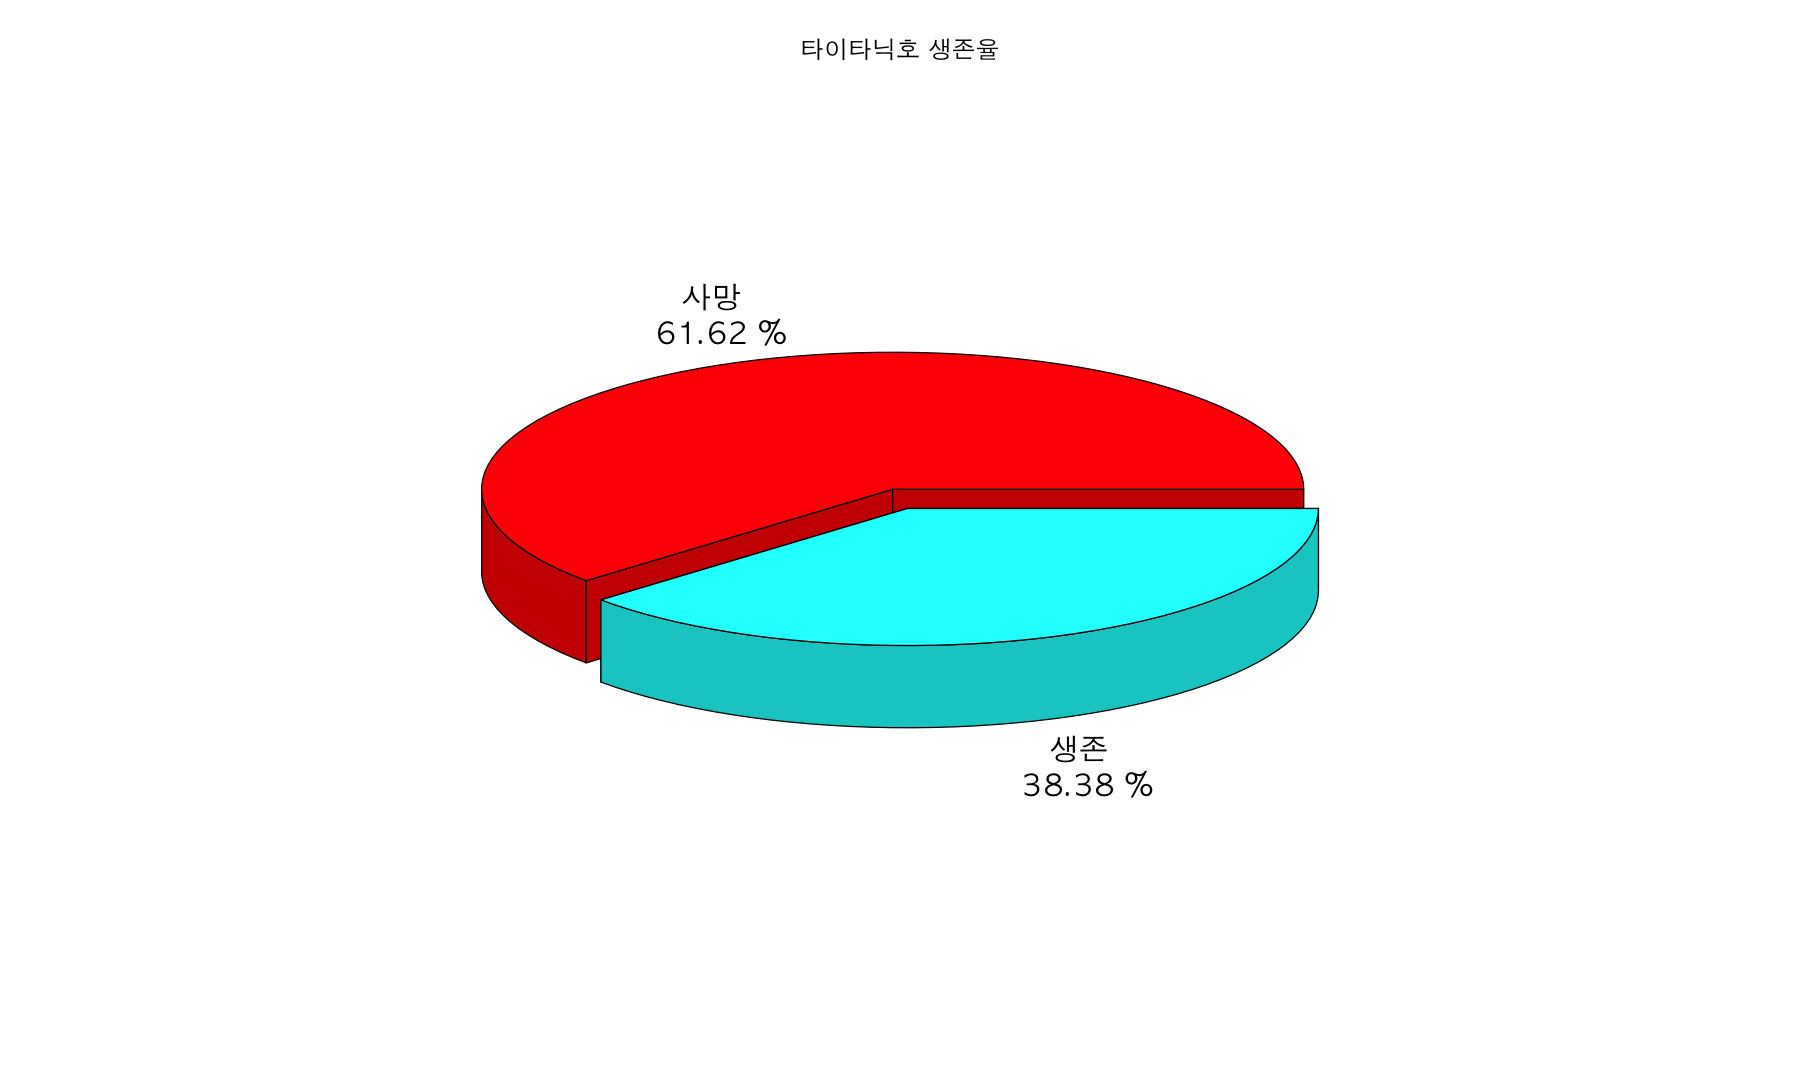

In [41]:
par(bg = 'white', family = 'applegothic')
pie3D(
    main = "타이타닉호 생존율",
    table(train_df$Survived),
    labels = paste(c("사망","생존"),"\n",round(table(train_df$Survived) / sum(table(train_df$Survived)) * 100,2),"%"),
    explode = 0.05
)

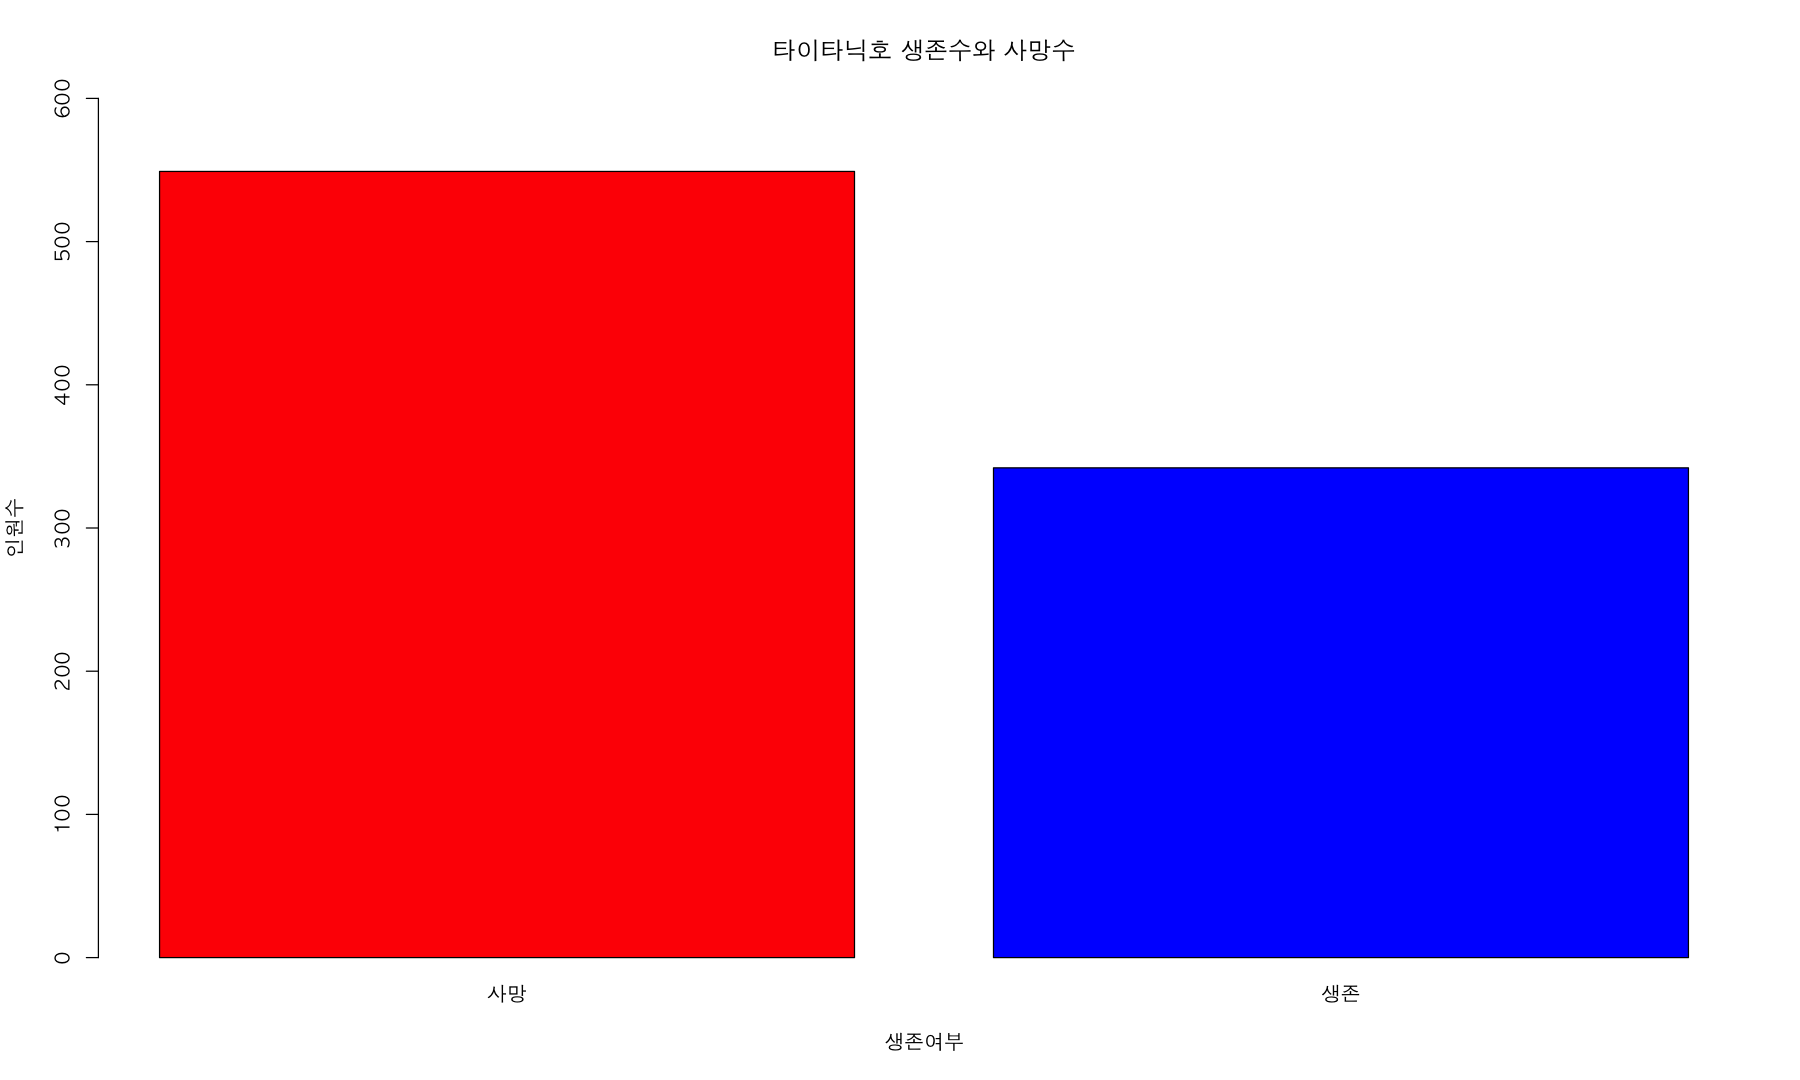

In [46]:
par(bg = 'white',family = 'applegothic')
barplot(
    main = "타이타닉호 생존수와 사망수",
    table(train_df$Survived),
    col = c('red','blue'),
    xlab = "생존여부",
    ylab = "인원수",
    name = c("사망","생존"),
    ylim = c(0,600)
)

> Survived 컬럼은 Target Data로 적합하다

# Feature Column 구성

In [ ]:
# 성별 컬럼 분류 확인
table(train_df$Sex)
unique(train_df$Sex)

In [50]:
# 여성의 인원과 남성의 인원 확인
577 / 891

[1] 0.647587

In [83]:
# 여성의 생존과 사망인원
nrow(subset(train_df, Sex == 'female'))
table(subset(train_df, Sex == 'female')$Survived)
# 남성의 생존과 사망인원
nrow(subset(train_df, Sex == 'male'))
table(subset(train_df, Sex == 'male')$Survived)

# 여성
# 생존 : 233, 사망 : 81

# 남성
# 생존 : 109, 사망 : 468

cat(paste(c("남성의 사망율 : ","남성의 생존율 : "), round(table(subset(train_df, Sex == 'male')$Survived) / sum(table(subset(train_df, Sex == 'male')$Survived)) * 100,2),"%","\n"),sep = "")
cat(paste(c("여성의 사망율 : ","여성의 생존율 : "), round(table(subset(train_df, Sex == 'female')$Survived) / sum(table(subset(train_df, Sex == 'female')$Survived)) * 100,2),"%","\n"),sep = "")

[1] 314


  0   1 
 81 233 

[1] 577


  0   1 
468 109 

남성의 사망율 :  81.11 % 
남성의 생존율 :  18.89 % 
여성의 사망율 :  25.8 % 
여성의 생존율 :  74.2 % 


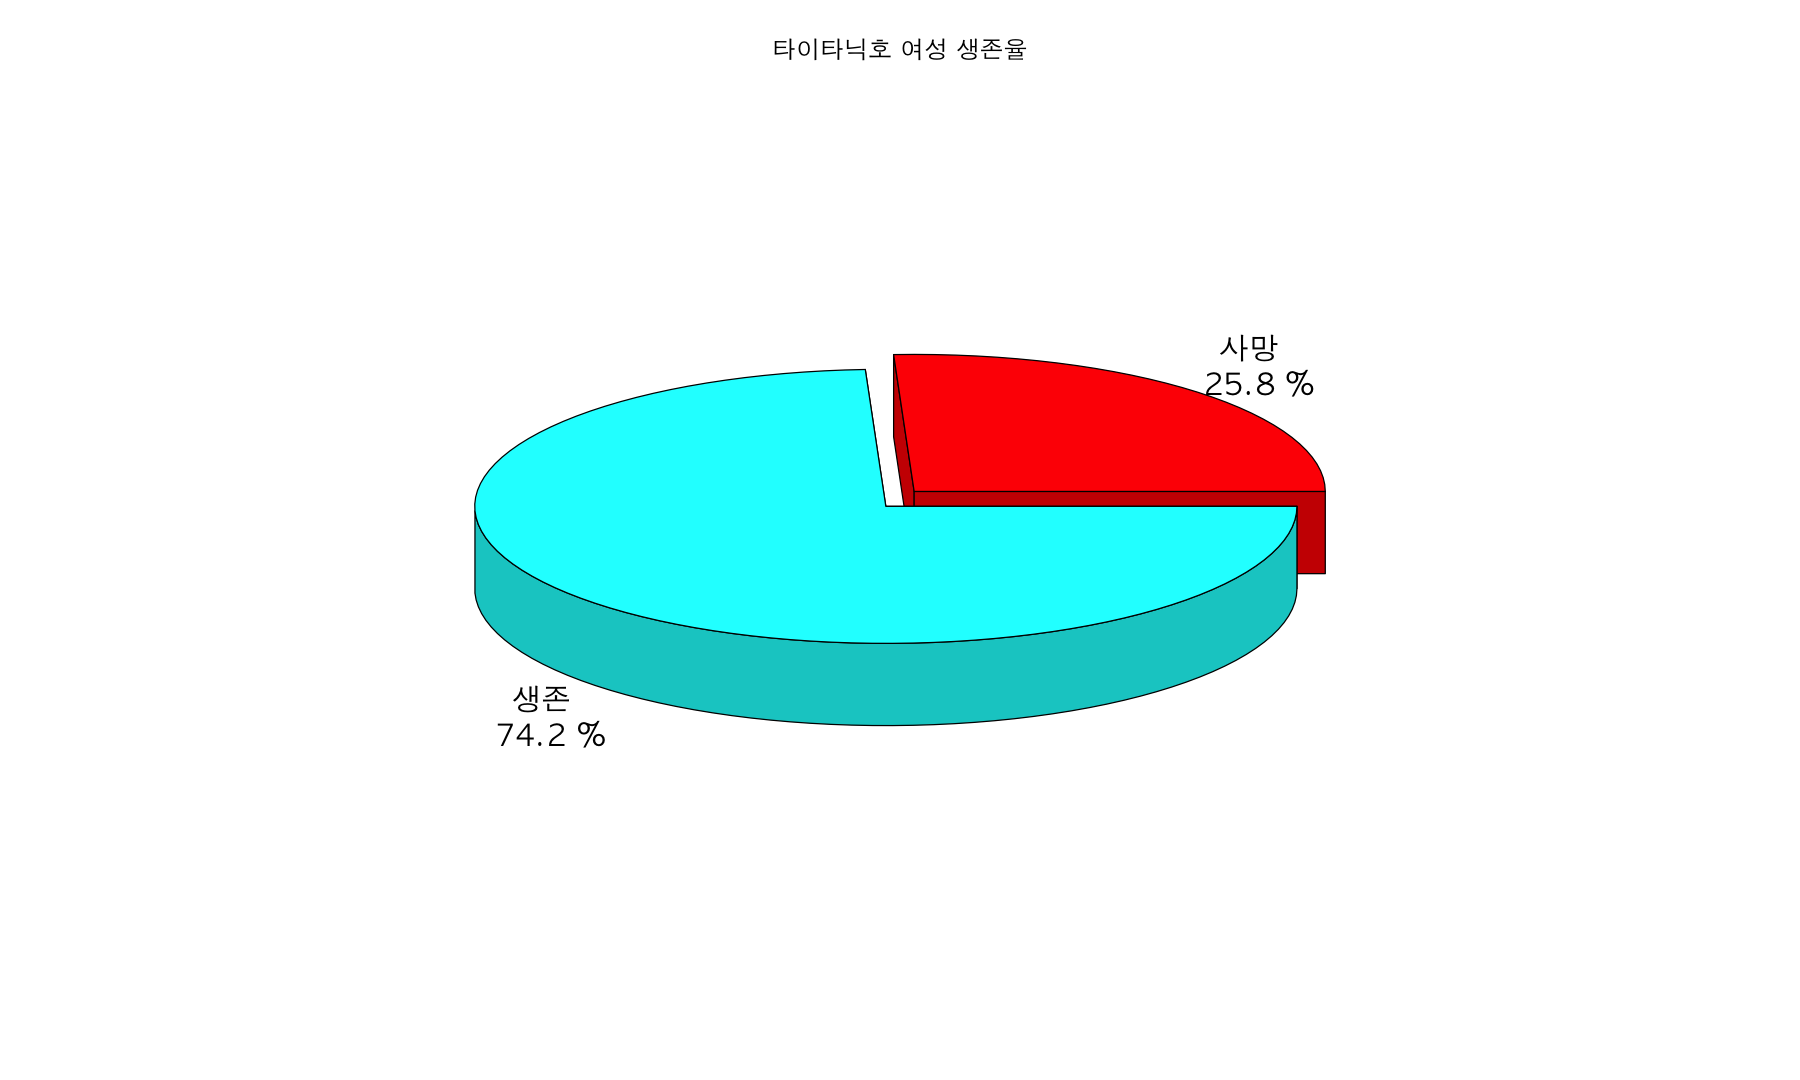

In [75]:
par(bg = 'white', family = 'applegothic')
pie3D(
    main = "타이타닉호 여성 생존율",
    table(subset(train_df, Sex == 'female')$Survived),
    labels = paste(c("사망","생존"),"\n",round(table(subset(train_df, Sex == 'female')$Survived) / sum(table(subset(train_df, Sex == 'female')$Survived)) * 100, 2),"%"),
    explode = 0.05
)

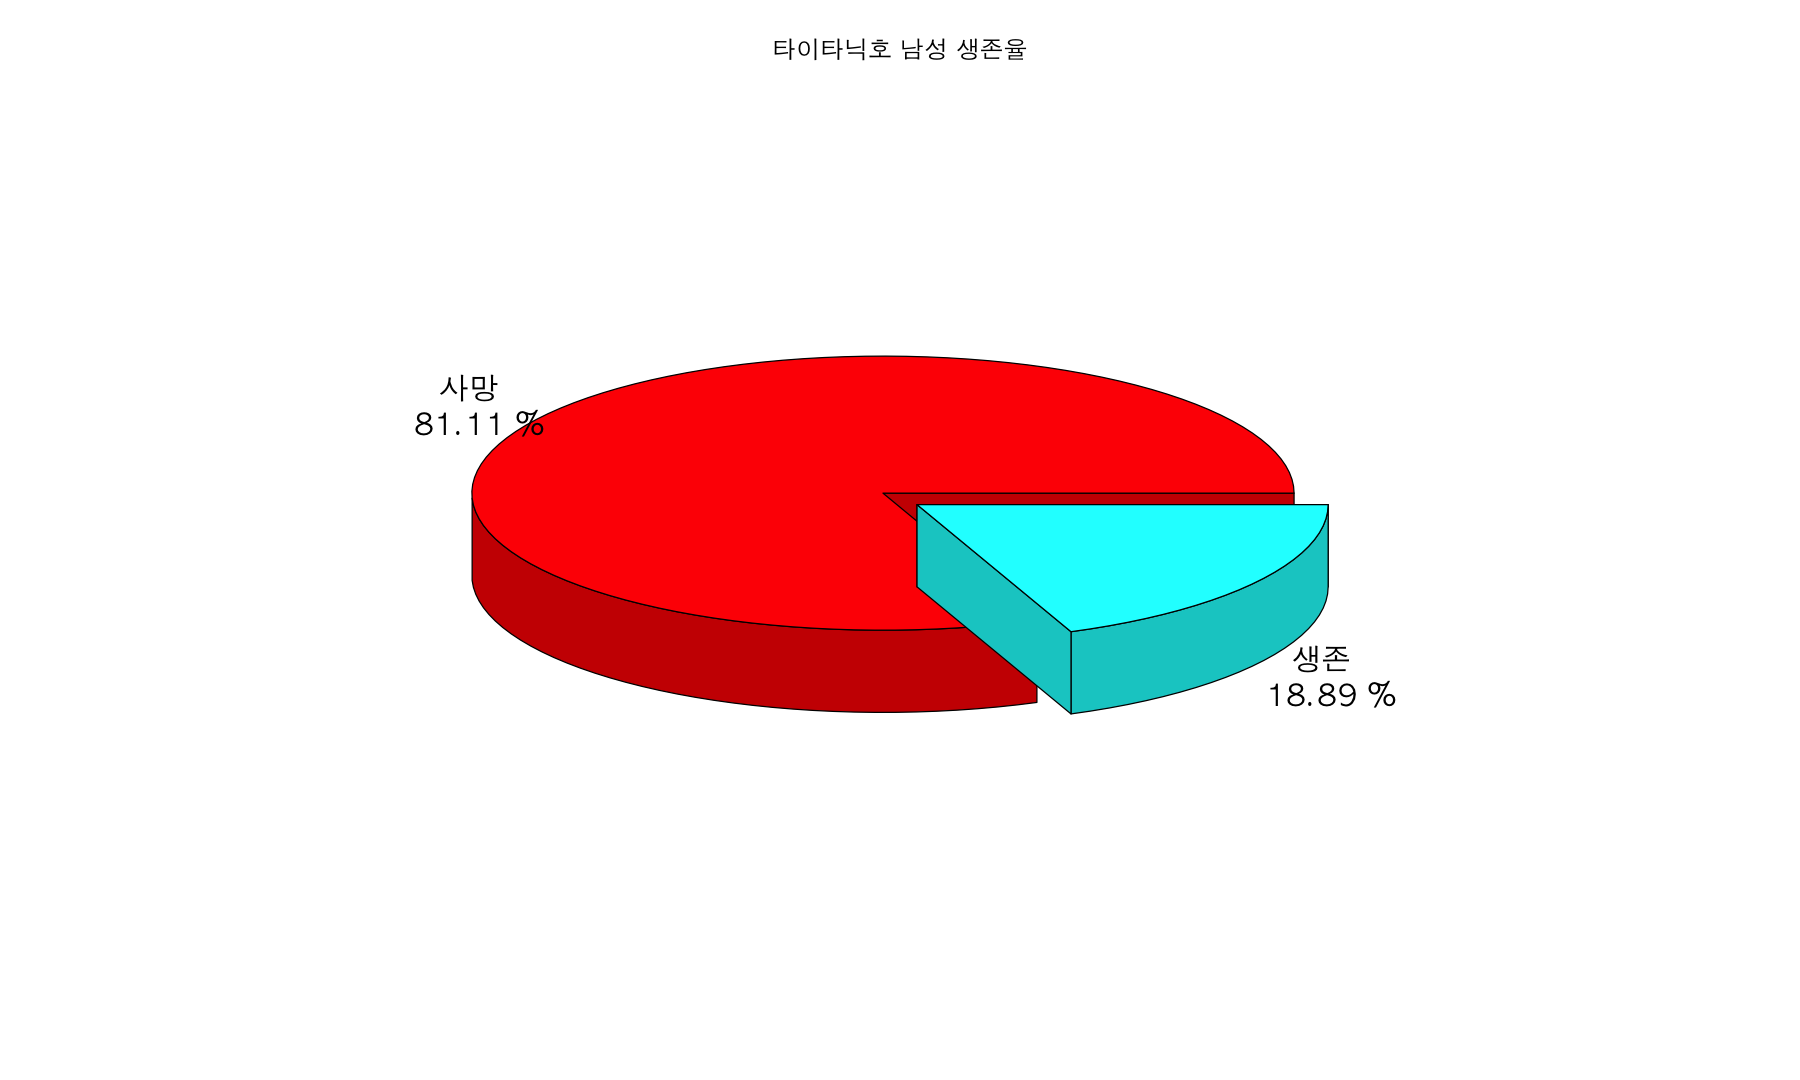

In [76]:
par(bg = 'white', family = 'applegothic')
pie3D(
    main = "타이타닉호 남성 생존율",
    table(subset(train_df, Sex == 'male')$Survived),
    labels = paste(c("사망","생존"),"\n",round(table(subset(train_df, Sex == 'male')$Survived) / sum(table(subset(train_df, Sex == 'male')$Survived)) * 100, 2),"%"),
    explode = 0.05
)

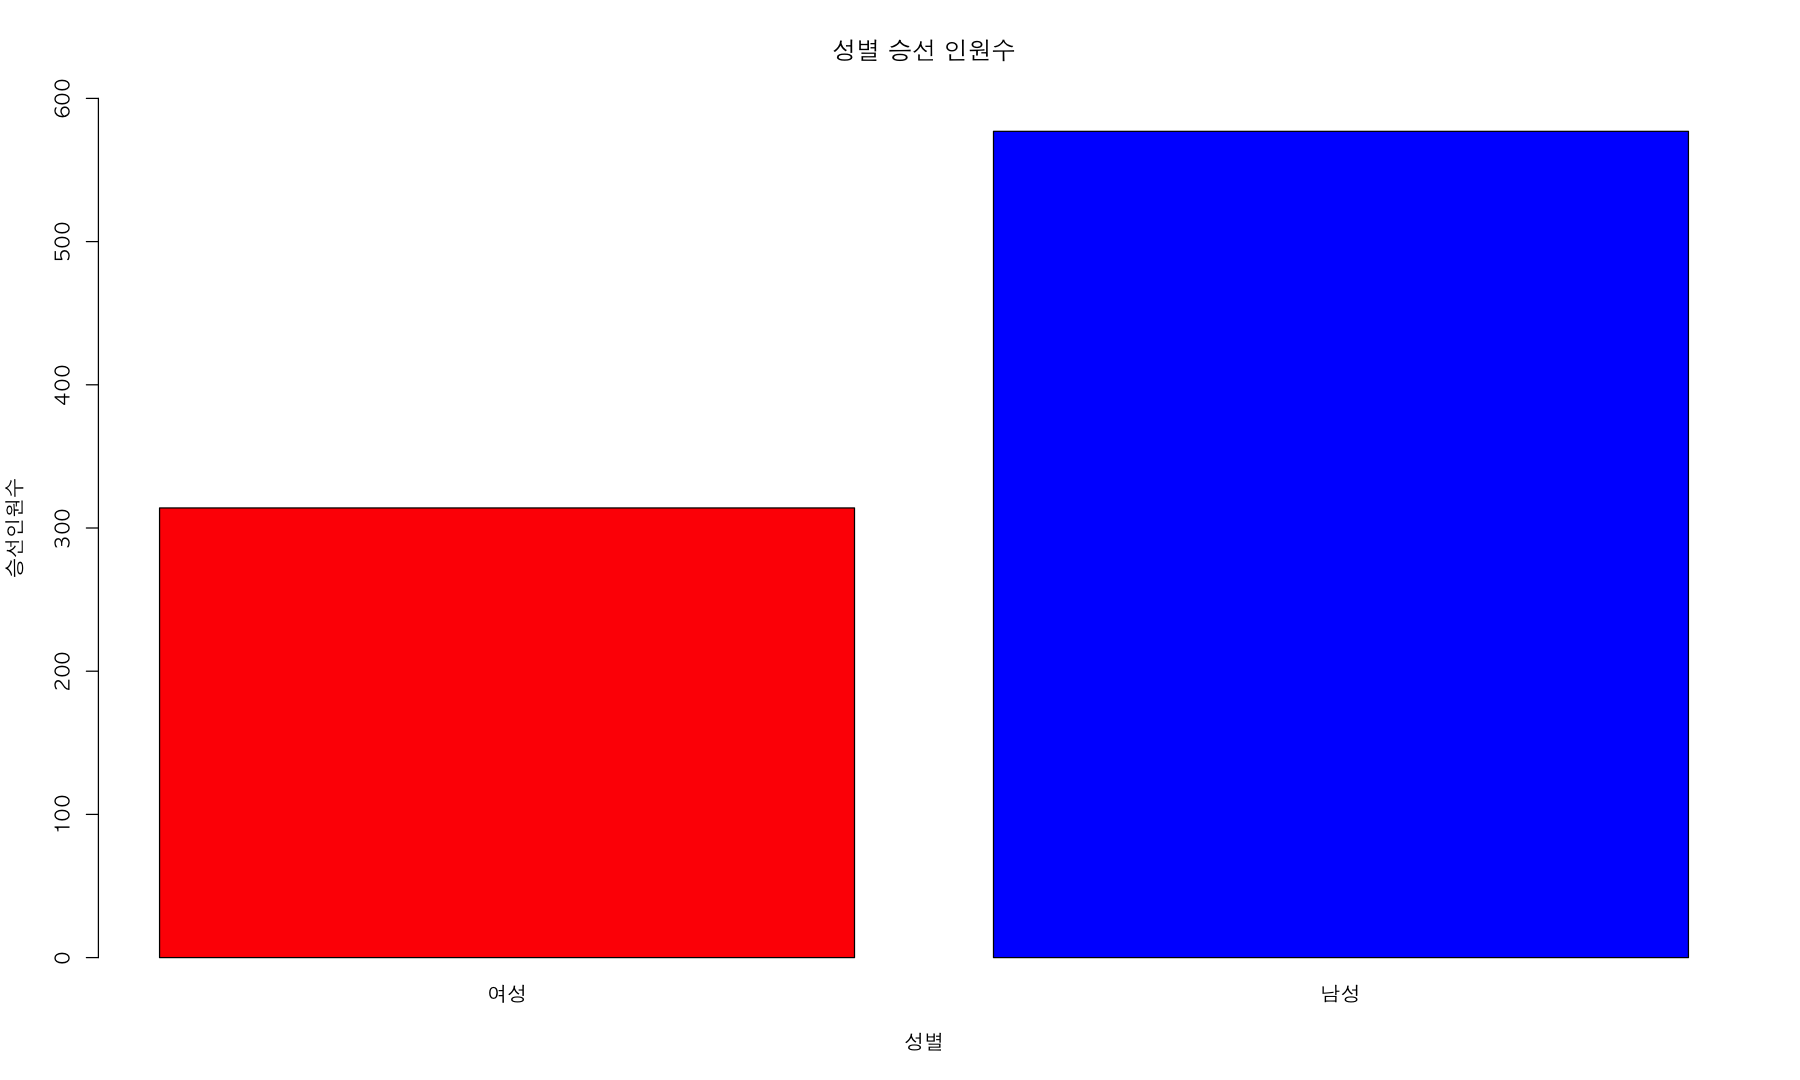

In [87]:
par(bg = 'white', family = "applegothic")
barplot(
    table(train_df$Sex),
    main = "성별 승선 인원수",
    ylim = c(0,600),
    xlab = "성별",
    ylab = "승선인원수",
    col = c('red','blue'),
    names = c("여성","남성")
    )

> [Survived] <- [Sex]

## 티켓 등급 분석

In [95]:
# 티켓등급 분류
table(train_df$Pclass)


  1   2   3 
216 184 491 

In [116]:
# 객실 등급에 따른 여성 생존율

# 1등급 객실 여성 생존율
table(subset(train_df, train_df$Pclass == 1 & train_df$Sex == "female")$Survived)

for(i in 1:3) {
    cat(i,"등 객실의 여성 생존율은", 
        table(subset(train_df, Pclass == i & Sex == "female")$Survived)[2], "/", sum(table(subset(train_df, Pclass == i & Sex == "female")$Survived)),",",
        round(table(subset(train_df, Pclass == i & Sex == "female")$Survived)[2]/sum(table(subset(train_df, Pclass == i & Sex == "female")$Survived)) * 100 ,2) ,"%","\n"
        )
}


 0  1 
 3 91 

1 등 객실의 여성 생존율은 91 / 94 , 96.81 % 
2 등 객실의 여성 생존율은 70 / 76 , 92.11 % 
3 등 객실의 여성 생존율은 72 / 144 , 50 % 


In [122]:
# 1,2,3등 객실의 남성과 여성 생존율을 for문을 통해 해결

train_df_aliverate <- c()
for(j in 1:2) {
    gender <- ifelse(j == 1, "female", "male")
    for(i in 1:3) {
        cat(i,"등 객실의",ifelse(j == 1, "여성", "남성"),"생존율은", 
            table(subset(train_df, Pclass == i & Sex == gender)$Survived)[2], "/", sum(table(subset(train_df, Pclass == i & Sex == gender)$Survived)),",",
            round(table(subset(train_df, Pclass == i & Sex == gender)$Survived)[2]/sum(table(subset(train_df, Pclass == i & Sex == gender)$Survived)) * 100 ,2) ,"%","\n"
            )
        train_df_aliverate <-  append(train_df_aliverate, round(table(subset(train_df, Pclass == i & Sex == gender)$Survived)[2]/sum(table(subset(train_df, Pclass == i & Sex == gender)$Survived)) * 100 ,2))
    }
    cat("-----------------------------------------\n")
}

1 등 객실의 여성 생존율은 91 / 94 , 96.81 % 
2 등 객실의 여성 생존율은 70 / 76 , 92.11 % 
3 등 객실의 여성 생존율은 72 / 144 , 50 % 
-----------------------------------------
1 등 객실의 남성 생존율은 45 / 122 , 36.89 % 
2 등 객실의 남성 생존율은 17 / 108 , 15.74 % 
3 등 객실의 남성 생존율은 47 / 347 , 13.54 % 
-----------------------------------------


In [123]:
train_df_aliverate

1     1     1     1     1     1 
96.81 92.11 50.00 36.89 15.74 13.54

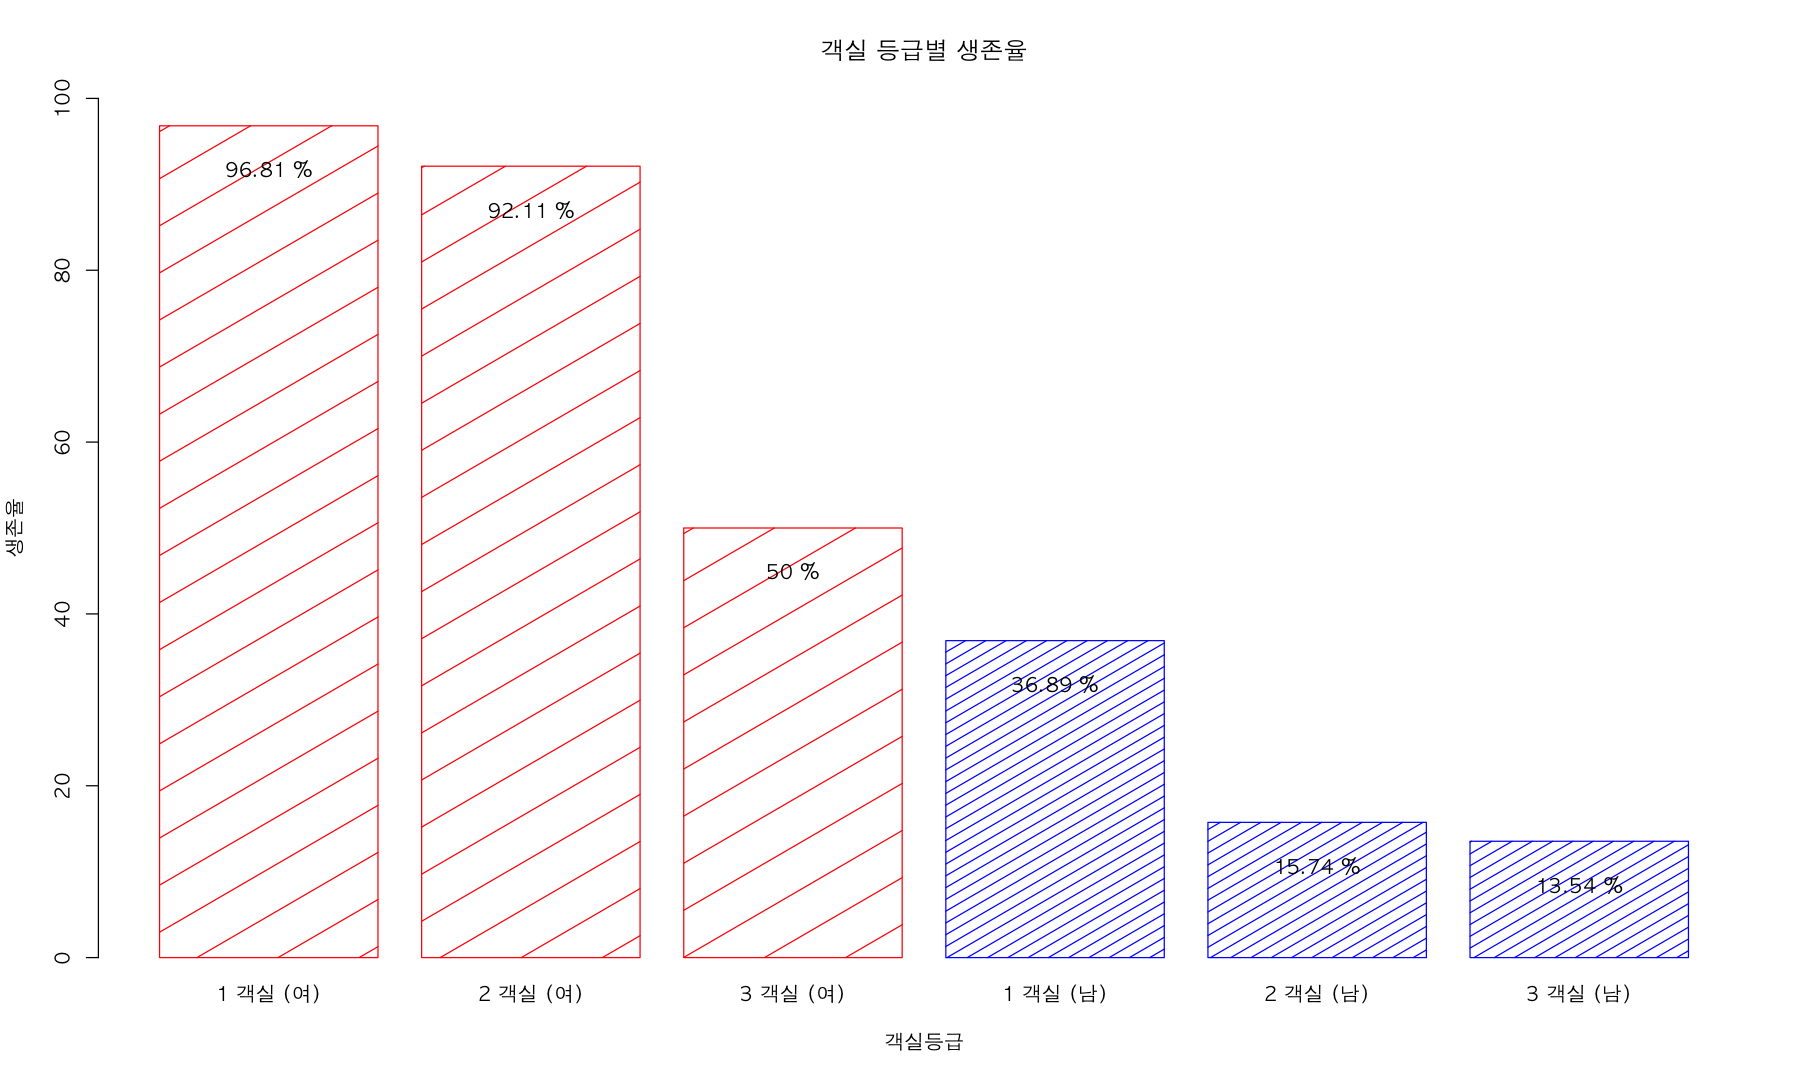

In [168]:
par(bg = 'white', family = 'applegothic')
barplot(
    main = "객실 등급별 생존율",
    train_df_aliverate,
    xlab = "객실등급",
    ylab = "생존율",
    names = paste(c(1,2,3),"객실",c(rep('(여)',3),rep('(남)',3))),
    ylim = c(0,100),
    col = c(rep('red',3), rep('blue',3)),
    density = c(rep(5,3),rep(20,3)),
    border = c(rep('red',3), rep('blue',3)),
)

text(
    1.2 * 0:5 + 0.7,
    # seq(0.7, 7, 1.2),
    train_df_aliverate - 5,
    paste(train_df_aliverate,"%")
)

## Embarked

In [175]:
# 탑승 항구 종류 확인
unique(train_df$Embarked)
table(train_df$Embarked)

[1] "S" "Q" "C" ""


      C   Q   S 
  2 168  77 644 

In [174]:
# 빈칸의 데이터 찾기
subset(train_df, Embarked == "")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [176]:
train_df1 <- train_df

In [ ]:
# 빈칸 항구 찾고 인원들을 S항구로 변경
# (1)
subset(train_df1, Embarked == '')
train_df1$Embarked <- ifelse(train_df1$Embarked == "", 'S', train_df1$Embarked)

# (2)
train_df[train_df$Embarked == "",]
train_df[train_df$Embarked == "",]$Embarked <- 'S'

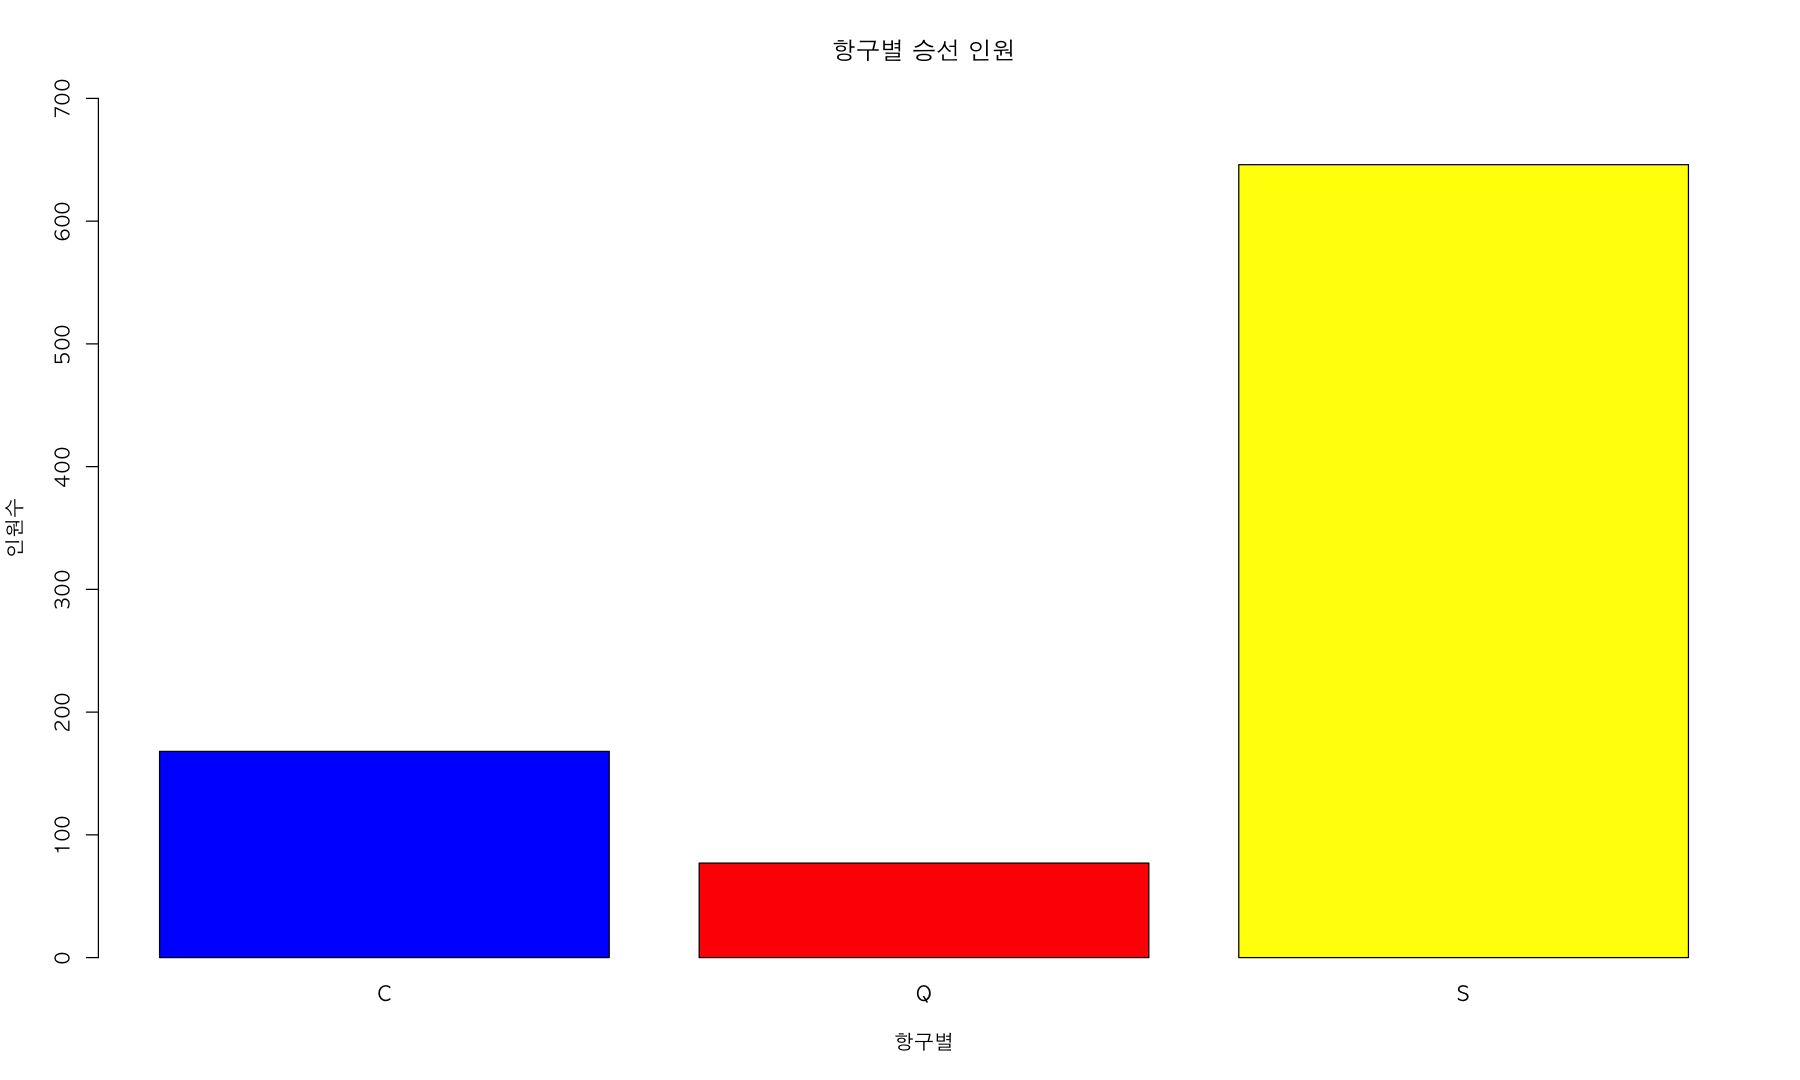

In [187]:
par(family = 'applegothic',bg = 'white')
barplot(
    main = "항구별 승선 인원",
    table(train_df$Embarked),
    xlab = "항구별",
    ylab = "인원수",
    ylim = c(0,700),
    col = c('blue','red','yellow')
)

In [191]:
table(train_df$Embarked, train_df$Sex)

   
    female male
  C     73   95
  Q     36   41
  S    205  441

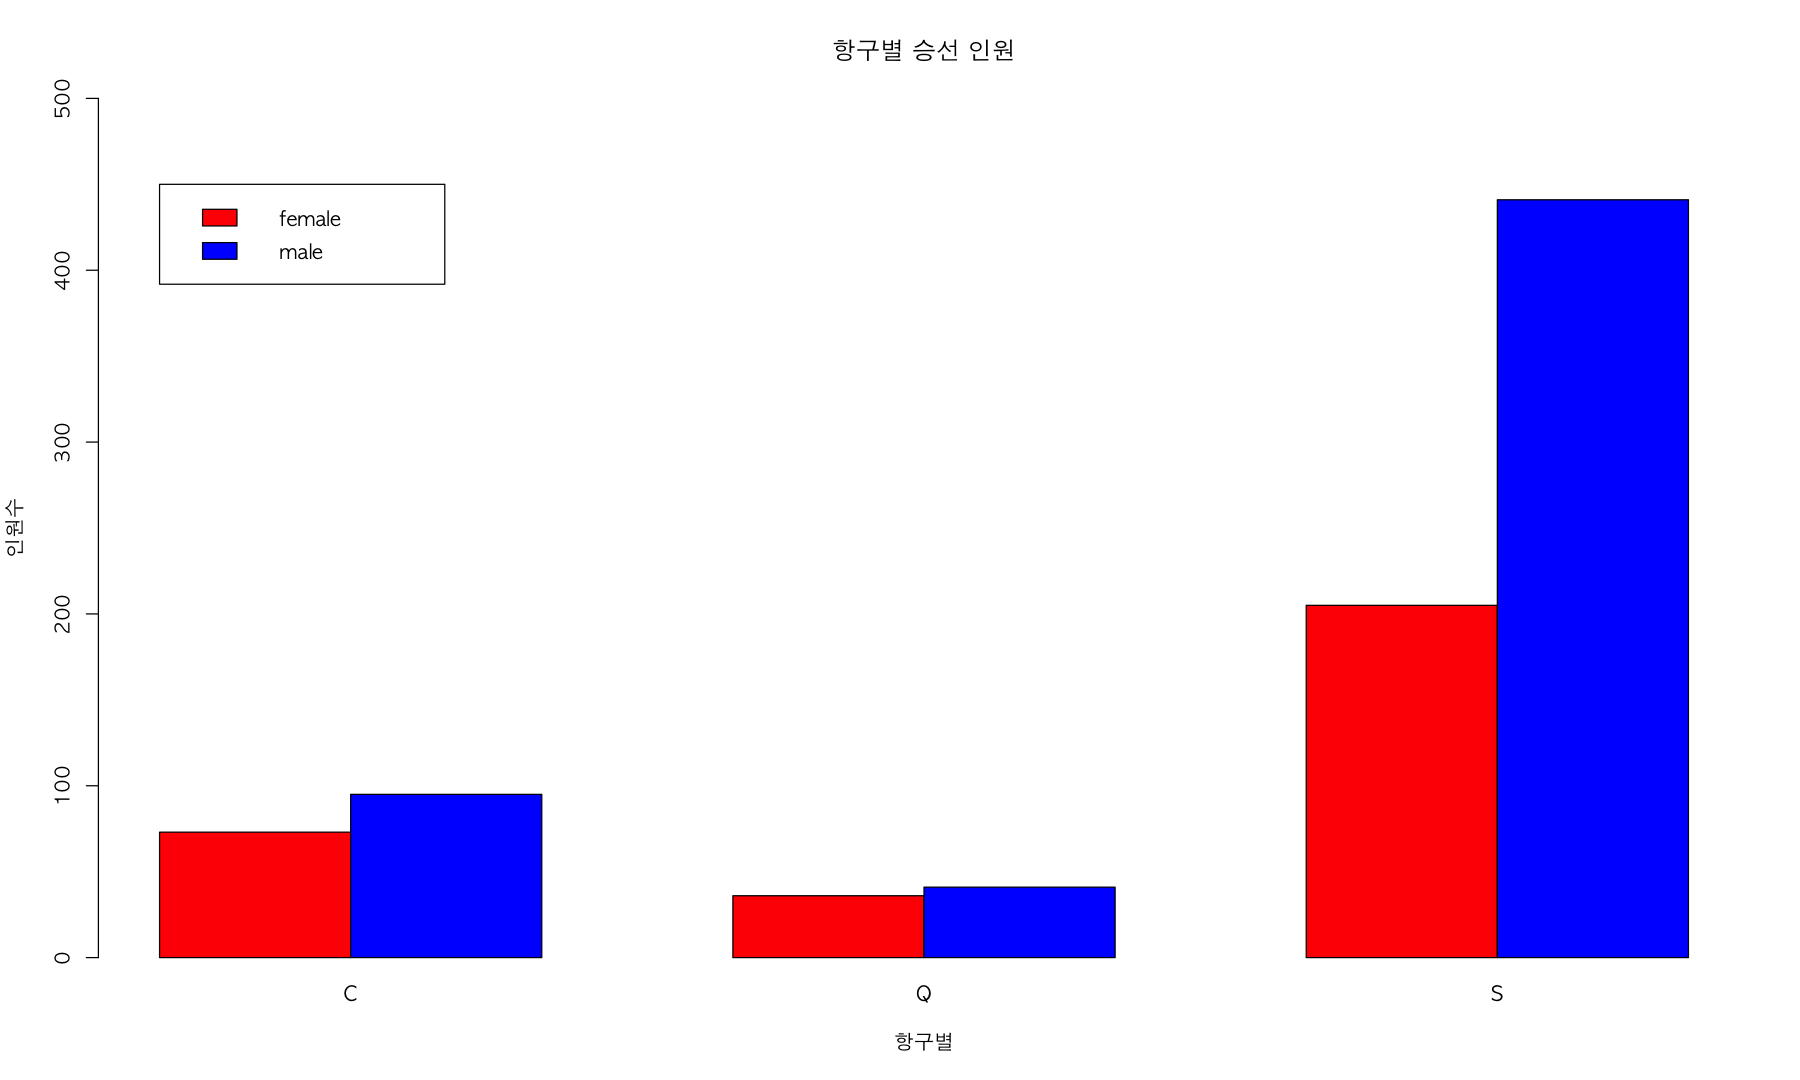

In [212]:
par(family = 'applegothic',bg = 'white')
barplot(
    main = "항구별 성별 승선 인원",
    t(table(train_df$Embarked, train_df$Sex)),
    xlab = "항구별 / 성별",
    ylab = "인원수",
    col = c('red','blue'),
    beside = T,
    ylim = c(0,500)
)
legend(
    1,450,
    legend = c('female','male'),
    fill = c('red','blue'),
)

In [213]:
table(train_df$Embarked, train_df$Survived)

   
      0   1
  C  75  93
  Q  47  30
  S 427 219

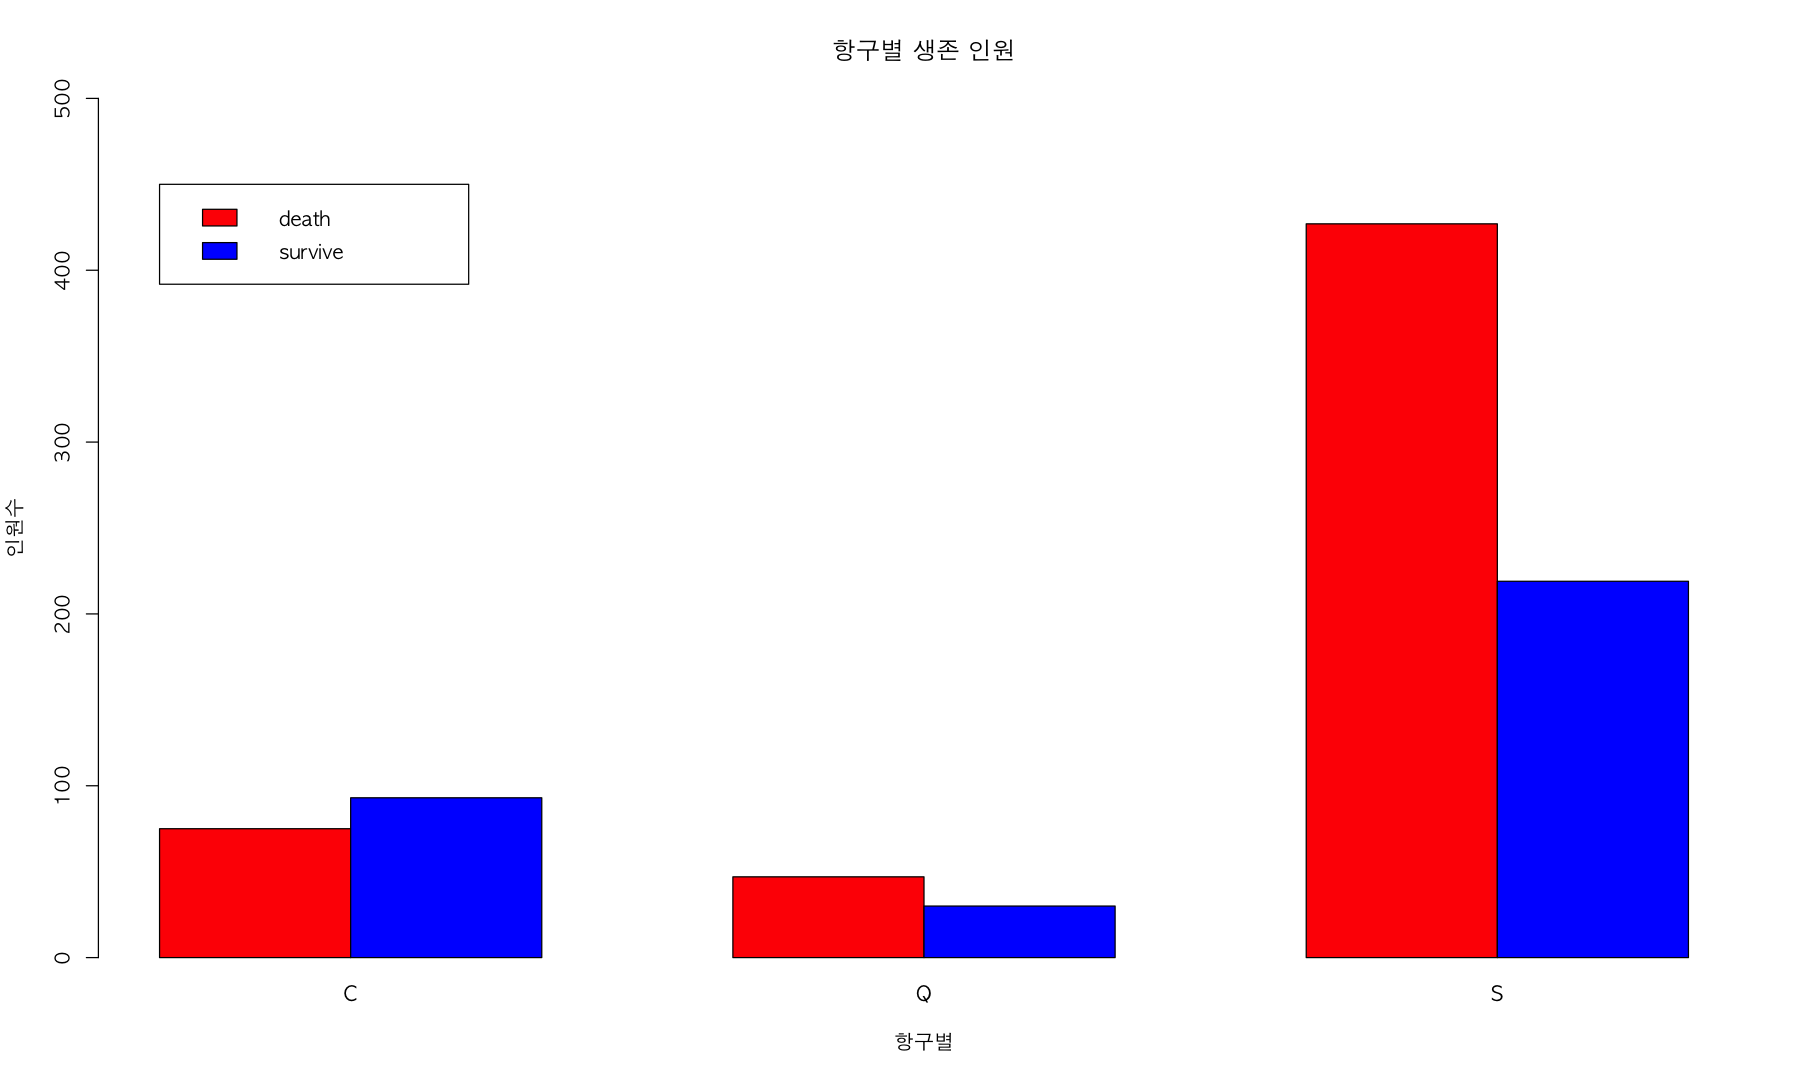

In [220]:
par(family = 'applegothic',bg = 'white')
barplot(
    main = "항구별 생존 인원",
    table(train_df$Survived, train_df$Embarked),
    xlab = "항구별",
    ylab = "인원수",
    col = c('red','blue'),
    beside = T,
    ylim = c(0,500)
)
legend(
    1,450,
    legend = c('death','survive'),
    fill = c('red','blue'),
)

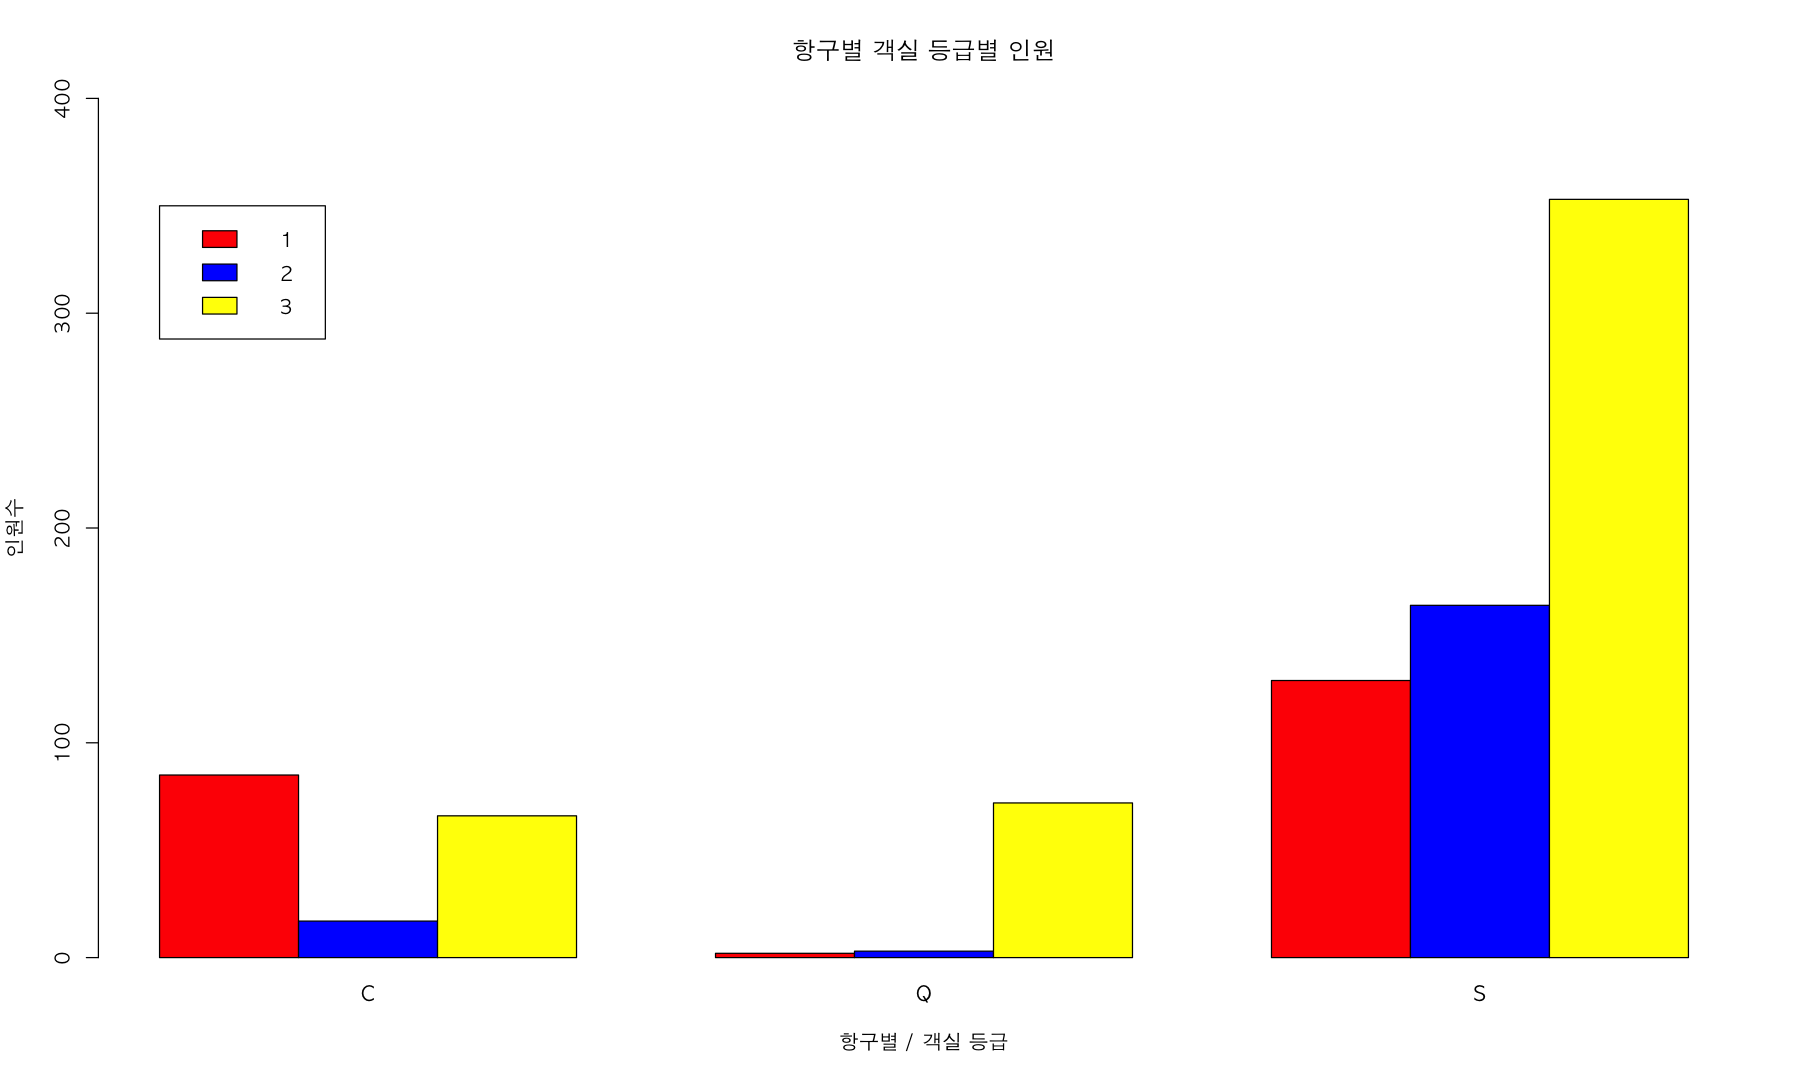

In [221]:
par(family = 'applegothic',bg = 'white')
barplot(
    main = "항구별 객실 등급별 인원",
    table(train_df$Pclass, train_df$Embarked),
    xlab = "항구별 / 객실 등급",
    ylab = "인원수",
    col = c('red','blue','yellow'),
    beside = T,
    ylim = c(0,400)
)
legend(
    1,350,
    legend = 1:3,
    fill = c('red','blue','yellow'),
)

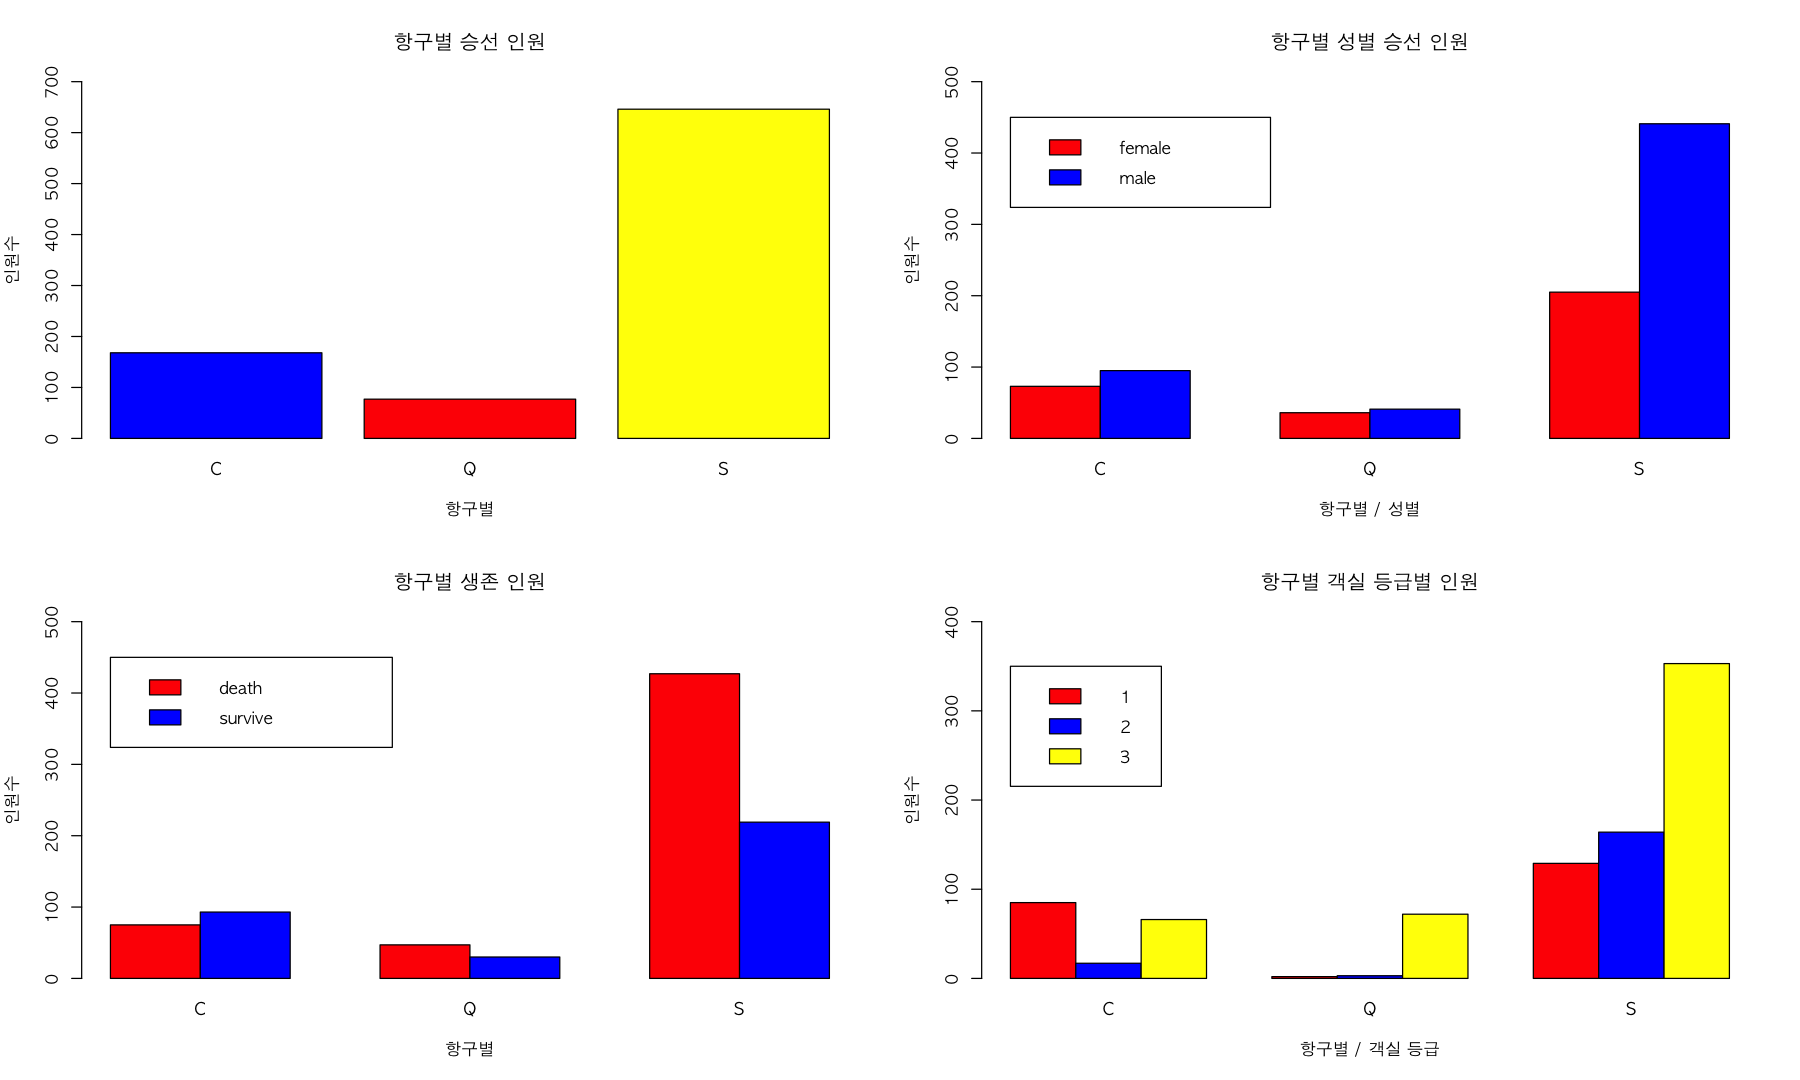

In [222]:
par(family = 'applegothic',bg = 'white',mfrow = c(2,2))
# 항구별 승선 인원
barplot(
    main = "항구별 승선 인원",
    table(train_df$Embarked),
    xlab = "항구별",
    ylab = "인원수",
    ylim = c(0,700),
    col = c('blue','red','yellow')
)

# 항구별 성별 승선 인원
barplot(
    main = "항구별 성별 승선 인원",
    t(table(train_df$Embarked, train_df$Sex)),
    xlab = "항구별 / 성별",
    ylab = "인원수",
    col = c('red','blue'),
    beside = T,
    ylim = c(0,500)
)
legend(
    1,450,
    legend = c('female','male'),
    fill = c('red','blue'),
)

# 항구별 생존 인원
barplot(
    main = "항구별 생존 인원",
    table(train_df$Survived, train_df$Embarked),
    xlab = "항구별",
    ylab = "인원수",
    col = c('red','blue'),
    beside = T,
    ylim = c(0,500)
)
legend(
    1,450,
    legend = c('death','survive'),
    fill = c('red','blue'),
)

# 항구별 객실 등급별 인원
barplot(
    main = "항구별 객실 등급별 인원",
    table(train_df$Pclass, train_df$Embarked),
    xlab = "항구별 / 객실 등급",
    ylab = "인원수",
    col = c('red','blue','yellow'),
    beside = T,
    ylim = c(0,400)
)
legend(
    1,350,
    legend = 1:3,
    fill = c('red','blue','yellow'),
)

> 절반 이상의 승객이 Southampton에서 배를 탔으며, 여기에서 탑승한 승객의 70%가 남성이었고,<br>
남성의 사망율이 여성보다 훨씬 높았으므로 Southampton의 사망율이 높게 집계되었다.<br>
또한 Southampton에서 탑승한 승객의 60% 이상이 3등급 객실을 사용했다.<br>
Chersbourg에서 탑승한 승객들은 1등 객실 비중 및 생존율이 높게 집계된 점으로 보아 귀빈층에 속한 인원이 많다고 추측된다.

In [223]:
# 생존과 티겟등급의 상관계수
cor(train_df$Survived, train_df$Pclass)

[1] -0.338481

> 1등급 객실이 가장 높은 객실이지만, 3등급 객실이 가장 높은 객실로 인식하여 역상관관계로 도출되었다.

# [Survived] <- [Sex, Pclass, Embarked]

In [224]:
train_df_T <- train_df

In [225]:
target_col <- c("Survived","Sex","Pclass","Embarked")
head(train_df_T[target_col])

,Survived,Sex,Pclass,Embarked
,<int>,<chr>,<int>,<chr>
1,0,male,3,S
2,0,male,3,S
3,0,male,3,Q
4,0,male,1,S
5,0,male,3,S
6,0,male,3,S
